In [59]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.wireframe import Wireframe
import keras 
from knn import knn
from samples.wireframe.database_actions import reinitialize_table, add_encoding
from samples.wireframe.knn import overlaps_bool
import plots

%matplotlib inline 

In [60]:
config = Wireframe.WireframeConfig()
WIREFRAME_DIR = os.path.join(ROOT_DIR, "datasets/wireframe")

Run with training **icons** and training **backgrounds**, but without the one-shot classes. 

In [67]:
NUM_TRAINING_IMAGES = 100
MAX_ICONS_PER_IMAGE = 1

# Training dataset
dataset_train = Wireframe.WireframeDataset()
dataset_train.generate_data(NUM_TRAINING_IMAGES, MAX_ICONS_PER_IMAGE)

dataset_train.load_wireframe(WIREFRAME_DIR, "train")
dataset_train.prepare()

# Validation dataset
dataset_val = Wireframe.WireframeDataset()
dataset_val.load_wireframe(WIREFRAME_DIR, "val")
dataset_val.prepare()

In [62]:
MODEL_NAME = "Mask_Res50.h5"

class InferenceConfig(Wireframe.WireframeConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(ROOT_DIR, MODEL_NAME)
# model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /Users/alexanderholstrup/git/Mask_RCNN/Mask_Res50.h5


In [63]:
reinitialize_table("Database.db")
for image_id in dataset_train.image_ids:
    print("Image no: {}".format(image_id))
    original_image, _, real_labels, real_bboxes, gt_mask = \
        modellib.load_image_gt(dataset_train, inference_config,
                               image_id, use_mini_mask=False)
    results = model.detect([original_image])
    detected_rois = results[0]['rois']
    embeddings = results[1]
    
    # For each roi: 
    for i, roi in enumerate(detected_rois):
        for j, bbox in enumerate(real_bboxes):
            if overlaps_bool(roi, bbox):
                embedding = embeddings[:, i, :]
                label = real_labels[j]
                add_encoding("Database.db", embedding, int(label))


Image no: 0
Image no: 1
Image no: 2
Image no: 3
Image no: 4
Image no: 5
Image no: 6
Image no: 7
Image no: 8
Image no: 9
Image no: 10
Image no: 11
Image no: 12
Image no: 13
Image no: 14
Image no: 15
Image no: 16
Image no: 17
Image no: 18
Image no: 19
Image no: 20
Image no: 21
Image no: 22
Image no: 23
Image no: 24
Image no: 25
Image no: 26
Image no: 27
Image no: 28
Image no: 29
Image no: 30
Image no: 31
Image no: 32
Image no: 33
Image no: 34
Image no: 35
Image no: 36
Image no: 37
Image no: 38
Image no: 39
Image no: 40
Image no: 41
Image no: 42
Image no: 43
Image no: 44
Image no: 45
Image no: 46
Image no: 47
Image no: 48
Image no: 49
Image no: 50
Image no: 51
Image no: 52
Image no: 53
Image no: 54
Image no: 55
Image no: 56
Image no: 57
Image no: 58
Image no: 59
Image no: 60
Image no: 61
Image no: 62
Image no: 63
Image no: 64
Image no: 65
Image no: 66
Image no: 67
Image no: 68
Image no: 69
Image no: 70
Image no: 71
Image no: 72
Image no: 73
Image no: 74
Image no: 75
Image no: 76
Image no:

IndexError: list index out of range

Train on 74 samples, validate on 25 samples
Epoch 1/1000
 - 2s - loss: 0.2998 - acc: 0.0000e+00 - val_loss: 0.2998 - val_acc: 0.0000e+00
Epoch 2/1000
 - 0s - loss: 0.2998 - acc: 0.0000e+00 - val_loss: 0.2998 - val_acc: 0.0000e+00
Epoch 3/1000
 - 0s - loss: 0.2998 - acc: 0.0000e+00 - val_loss: 0.2998 - val_acc: 0.0000e+00
Epoch 4/1000
 - 0s - loss: 0.2998 - acc: 0.0000e+00 - val_loss: 0.2998 - val_acc: 0.0000e+00
Epoch 5/1000
 - 0s - loss: 0.2997 - acc: 0.0000e+00 - val_loss: 0.2998 - val_acc: 0.0000e+00
Epoch 6/1000
 - 0s - loss: 0.2997 - acc: 0.0000e+00 - val_loss: 0.2997 - val_acc: 0.0000e+00
Epoch 7/1000
 - 0s - loss: 0.2997 - acc: 0.0000e+00 - val_loss: 0.2997 - val_acc: 0.0000e+00
Epoch 8/1000
 - 0s - loss: 0.2996 - acc: 0.0000e+00 - val_loss: 0.2997 - val_acc: 0.0000e+00
Epoch 9/1000
 - 0s - loss: 0.2996 - acc: 0.0000e+00 - val_loss: 0.2997 - val_acc: 0.0000e+00
Epoch 10/1000
 - 0s - loss: 0.2996 - acc: 0.0000e+00 - val_loss: 0.2996 - val_acc: 0.0000e+00
Epoch 11/1000
 - 0s - los

Epoch 88/1000
 - 0s - loss: 0.2955 - acc: 0.0000e+00 - val_loss: 0.2968 - val_acc: 0.0000e+00
Epoch 89/1000
 - 0s - loss: 0.2956 - acc: 0.0000e+00 - val_loss: 0.2967 - val_acc: 0.0000e+00
Epoch 90/1000
 - 0s - loss: 0.2955 - acc: 0.0000e+00 - val_loss: 0.2967 - val_acc: 0.0000e+00
Epoch 91/1000
 - 0s - loss: 0.2953 - acc: 0.0135 - val_loss: 0.2966 - val_acc: 0.0400
Epoch 92/1000
 - 0s - loss: 0.2955 - acc: 0.0135 - val_loss: 0.2966 - val_acc: 0.0400
Epoch 93/1000
 - 0s - loss: 0.2954 - acc: 0.0135 - val_loss: 0.2965 - val_acc: 0.0400
Epoch 94/1000
 - 0s - loss: 0.2951 - acc: 0.0135 - val_loss: 0.2965 - val_acc: 0.0400
Epoch 95/1000
 - 0s - loss: 0.2952 - acc: 0.0135 - val_loss: 0.2964 - val_acc: 0.0800
Epoch 96/1000
 - 0s - loss: 0.2952 - acc: 0.0135 - val_loss: 0.2964 - val_acc: 0.1200
Epoch 97/1000
 - 0s - loss: 0.2948 - acc: 0.0135 - val_loss: 0.2963 - val_acc: 0.1200
Epoch 98/1000
 - 0s - loss: 0.2950 - acc: 0.0270 - val_loss: 0.2963 - val_acc: 0.1200
Epoch 99/1000
 - 0s - loss: 0.

 - 0s - loss: 0.2880 - acc: 0.2027 - val_loss: 0.2907 - val_acc: 0.3200
Epoch 183/1000
 - 0s - loss: 0.2874 - acc: 0.2027 - val_loss: 0.2906 - val_acc: 0.3200
Epoch 184/1000
 - 0s - loss: 0.2876 - acc: 0.2027 - val_loss: 0.2905 - val_acc: 0.3200
Epoch 185/1000
 - 0s - loss: 0.2876 - acc: 0.2027 - val_loss: 0.2904 - val_acc: 0.3200
Epoch 186/1000
 - 0s - loss: 0.2873 - acc: 0.2027 - val_loss: 0.2903 - val_acc: 0.3200
Epoch 187/1000
 - 0s - loss: 0.2876 - acc: 0.2027 - val_loss: 0.2902 - val_acc: 0.3200
Epoch 188/1000
 - 0s - loss: 0.2871 - acc: 0.2027 - val_loss: 0.2901 - val_acc: 0.3200
Epoch 189/1000
 - 0s - loss: 0.2872 - acc: 0.2027 - val_loss: 0.2900 - val_acc: 0.3200
Epoch 190/1000
 - 0s - loss: 0.2869 - acc: 0.2027 - val_loss: 0.2899 - val_acc: 0.3200
Epoch 191/1000
 - 0s - loss: 0.2865 - acc: 0.2027 - val_loss: 0.2898 - val_acc: 0.3200
Epoch 192/1000
 - 0s - loss: 0.2862 - acc: 0.2027 - val_loss: 0.2897 - val_acc: 0.3200
Epoch 193/1000
 - 0s - loss: 0.2868 - acc: 0.2027 - val_lo

Epoch 277/1000
 - 0s - loss: 0.2729 - acc: 0.0270 - val_loss: 0.2790 - val_acc: 0.0800
Epoch 278/1000
 - 0s - loss: 0.2717 - acc: 0.0270 - val_loss: 0.2789 - val_acc: 0.0800
Epoch 279/1000
 - 0s - loss: 0.2728 - acc: 0.0270 - val_loss: 0.2787 - val_acc: 0.0800
Epoch 280/1000
 - 0s - loss: 0.2713 - acc: 0.0270 - val_loss: 0.2786 - val_acc: 0.0800
Epoch 281/1000
 - 0s - loss: 0.2718 - acc: 0.0270 - val_loss: 0.2784 - val_acc: 0.0800
Epoch 282/1000
 - 0s - loss: 0.2720 - acc: 0.0270 - val_loss: 0.2783 - val_acc: 0.0800
Epoch 283/1000
 - 0s - loss: 0.2714 - acc: 0.0270 - val_loss: 0.2781 - val_acc: 0.0400
Epoch 284/1000
 - 0s - loss: 0.2712 - acc: 0.0270 - val_loss: 0.2780 - val_acc: 0.0400
Epoch 285/1000
 - 0s - loss: 0.2711 - acc: 0.0270 - val_loss: 0.2778 - val_acc: 0.0400
Epoch 286/1000
 - 0s - loss: 0.2697 - acc: 0.0270 - val_loss: 0.2776 - val_acc: 0.0400
Epoch 287/1000
 - 0s - loss: 0.2710 - acc: 0.0270 - val_loss: 0.2775 - val_acc: 0.0400
Epoch 288/1000
 - 0s - loss: 0.2688 - acc: 

 - 0s - loss: 0.2529 - acc: 0.0000e+00 - val_loss: 0.2638 - val_acc: 0.0000e+00
Epoch 366/1000
 - 0s - loss: 0.2522 - acc: 0.0000e+00 - val_loss: 0.2636 - val_acc: 0.0000e+00
Epoch 367/1000
 - 0s - loss: 0.2518 - acc: 0.0000e+00 - val_loss: 0.2634 - val_acc: 0.0000e+00
Epoch 368/1000
 - 0s - loss: 0.2496 - acc: 0.0000e+00 - val_loss: 0.2632 - val_acc: 0.0000e+00
Epoch 369/1000
 - 0s - loss: 0.2500 - acc: 0.0000e+00 - val_loss: 0.2631 - val_acc: 0.0000e+00
Epoch 370/1000
 - 0s - loss: 0.2512 - acc: 0.0000e+00 - val_loss: 0.2629 - val_acc: 0.0000e+00
Epoch 371/1000
 - 0s - loss: 0.2512 - acc: 0.0000e+00 - val_loss: 0.2627 - val_acc: 0.0000e+00
Epoch 372/1000
 - 0s - loss: 0.2511 - acc: 0.0000e+00 - val_loss: 0.2625 - val_acc: 0.0000e+00
Epoch 373/1000
 - 0s - loss: 0.2502 - acc: 0.0000e+00 - val_loss: 0.2623 - val_acc: 0.0000e+00
Epoch 374/1000
 - 0s - loss: 0.2495 - acc: 0.0000e+00 - val_loss: 0.2621 - val_acc: 0.0000e+00
Epoch 375/1000
 - 0s - loss: 0.2506 - acc: 0.0000e+00 - val_loss:

Epoch 452/1000
 - 0s - loss: 0.2261 - acc: 0.0000e+00 - val_loss: 0.2460 - val_acc: 0.0000e+00
Epoch 453/1000
 - 0s - loss: 0.2332 - acc: 0.0000e+00 - val_loss: 0.2457 - val_acc: 0.0000e+00
Epoch 454/1000
 - 0s - loss: 0.2233 - acc: 0.0000e+00 - val_loss: 0.2455 - val_acc: 0.0000e+00
Epoch 455/1000
 - 0s - loss: 0.2273 - acc: 0.0000e+00 - val_loss: 0.2453 - val_acc: 0.0000e+00
Epoch 456/1000
 - 0s - loss: 0.2254 - acc: 0.0000e+00 - val_loss: 0.2450 - val_acc: 0.0000e+00
Epoch 457/1000
 - 0s - loss: 0.2269 - acc: 0.0000e+00 - val_loss: 0.2448 - val_acc: 0.0000e+00
Epoch 458/1000
 - 0s - loss: 0.2269 - acc: 0.0000e+00 - val_loss: 0.2445 - val_acc: 0.0000e+00
Epoch 459/1000
 - 0s - loss: 0.2264 - acc: 0.0000e+00 - val_loss: 0.2443 - val_acc: 0.0000e+00
Epoch 460/1000
 - 0s - loss: 0.2229 - acc: 0.0000e+00 - val_loss: 0.2441 - val_acc: 0.0000e+00
Epoch 461/1000
 - 0s - loss: 0.2242 - acc: 0.0000e+00 - val_loss: 0.2438 - val_acc: 0.0000e+00
Epoch 462/1000
 - 0s - loss: 0.2227 - acc: 0.0000e

Epoch 539/1000
 - 0s - loss: 0.1877 - acc: 0.0000e+00 - val_loss: 0.2206 - val_acc: 0.0000e+00
Epoch 540/1000
 - 0s - loss: 0.1889 - acc: 0.0000e+00 - val_loss: 0.2202 - val_acc: 0.0000e+00
Epoch 541/1000
 - 0s - loss: 0.1889 - acc: 0.0000e+00 - val_loss: 0.2198 - val_acc: 0.0000e+00
Epoch 542/1000
 - 0s - loss: 0.1892 - acc: 0.0000e+00 - val_loss: 0.2194 - val_acc: 0.0000e+00
Epoch 543/1000
 - 0s - loss: 0.1842 - acc: 0.0000e+00 - val_loss: 0.2190 - val_acc: 0.0000e+00
Epoch 544/1000
 - 0s - loss: 0.1844 - acc: 0.0000e+00 - val_loss: 0.2186 - val_acc: 0.0000e+00
Epoch 545/1000
 - 0s - loss: 0.1857 - acc: 0.0000e+00 - val_loss: 0.2182 - val_acc: 0.0000e+00
Epoch 546/1000
 - 0s - loss: 0.1858 - acc: 0.0000e+00 - val_loss: 0.2178 - val_acc: 0.0000e+00
Epoch 547/1000
 - 0s - loss: 0.1856 - acc: 0.0000e+00 - val_loss: 0.2174 - val_acc: 0.0000e+00
Epoch 548/1000
 - 0s - loss: 0.1833 - acc: 0.0000e+00 - val_loss: 0.2170 - val_acc: 0.0000e+00
Epoch 549/1000
 - 0s - loss: 0.1856 - acc: 0.0000e

Epoch 626/1000
 - 0s - loss: 0.1430 - acc: 0.0000e+00 - val_loss: 0.1858 - val_acc: 0.0000e+00
Epoch 627/1000
 - 0s - loss: 0.1458 - acc: 0.0000e+00 - val_loss: 0.1858 - val_acc: 0.0000e+00
Epoch 628/1000
 - 0s - loss: 0.1448 - acc: 0.0000e+00 - val_loss: 0.1858 - val_acc: 0.0000e+00
Epoch 629/1000
 - 0s - loss: 0.1411 - acc: 0.0000e+00 - val_loss: 0.1858 - val_acc: 0.0000e+00
Epoch 630/1000
 - 0s - loss: 0.1486 - acc: 0.0000e+00 - val_loss: 0.1856 - val_acc: 0.0000e+00
Epoch 631/1000
 - 0s - loss: 0.1441 - acc: 0.0000e+00 - val_loss: 0.1852 - val_acc: 0.0000e+00
Epoch 632/1000
 - 0s - loss: 0.1424 - acc: 0.0000e+00 - val_loss: 0.1850 - val_acc: 0.0000e+00
Epoch 633/1000
 - 0s - loss: 0.1367 - acc: 0.0000e+00 - val_loss: 0.1851 - val_acc: 0.0000e+00
Epoch 634/1000
 - 0s - loss: 0.1331 - acc: 0.0000e+00 - val_loss: 0.1849 - val_acc: 0.0000e+00
Epoch 635/1000
 - 0s - loss: 0.1451 - acc: 0.0000e+00 - val_loss: 0.1845 - val_acc: 0.0000e+00
Epoch 636/1000
 - 0s - loss: 0.1419 - acc: 0.0000e

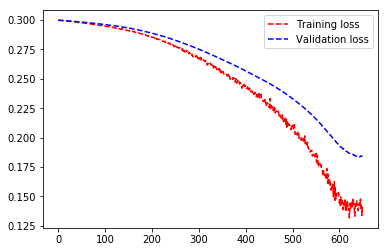

In [64]:
from model_triplet import Model 
from samples.wireframe.database_actions import get_known_encodings


#Save the losses
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.trainlosses = []
        self.vallosses = []

    def on_epoch_end(self, epoch, logs={}):
        self.trainlosses.append(logs.get('loss'))
        self.vallosses.append(logs.get('val_loss'))

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=8,
                                           verbose=0, mode='auto', baseline=None, restore_best_weights=True)

embeddings, labels = get_known_encodings('Database.db', 1024)

#Train the model
history = LossHistory()
triplet_model = Model()
triplet_model.model.fit(embeddings.T, labels, batch_size=50, epochs=1000, callbacks=[history, stop_early], validation_split=0.25
                , verbose=2)



#Plot the training loss
line1 = plt.plot(history.trainlosses, 'r--', label = "Training loss")
plt.plot(history.vallosses, 'b--', label = "Validation loss")
plt.legend()
plt.show()


#Save the weights
triplet_model.model.save_weights("Triplet_Res50_03.h5")




In [68]:
reinitialize_table("Database.db")
for image_id in dataset_train.image_ids:
    print("Image no: {}".format(image_id))
    original_image, _, real_labels, real_bboxes, gt_mask = \
        modellib.load_image_gt(dataset_train, inference_config,
                               image_id, use_mini_mask=False)
    results = model.detect([original_image])
    detected_rois = results[0]['rois']
    embeddings = results[1]
    
    # For each roi: 
    for i, roi in enumerate(detected_rois):
        for j, bbox in enumerate(real_bboxes):
            if overlaps_bool(roi, bbox):
                embedding = embeddings[:, i, :]
                embedding = triplet_model.model.predict(embedding)
                label = real_labels[j]
                add_encoding("Database.db", embedding, int(label))

Image no: 0
Image no: 1
Image no: 2
Image no: 3
Image no: 4
Image no: 5
Image no: 6
Image no: 7
Image no: 8
Image no: 9
Image no: 10
Image no: 11
Image no: 12
Image no: 13
Image no: 14
Image no: 15
Image no: 16
Image no: 17
Image no: 18
Image no: 19
Image no: 20
Image no: 21
Image no: 22
Image no: 23
Image no: 24
Image no: 25
Image no: 26
Image no: 27
Image no: 28
Image no: 29
Image no: 30
Image no: 31
Image no: 32
Image no: 33
Image no: 34
Image no: 35
Image no: 36
Image no: 37
Image no: 38
Image no: 39
Image no: 40
Image no: 41
Image no: 42
Image no: 43
Image no: 44
Image no: 45
Image no: 46
Image no: 47
Image no: 48
Image no: 49
Image no: 50
Image no: 51
Image no: 52
Image no: 53
Image no: 54
Image no: 55
Image no: 56
Image no: 57
Image no: 58
Image no: 59
Image no: 60
Image no: 61
Image no: 62
Image no: 63
Image no: 64
Image no: 65
Image no: 66
Image no: 67
Image no: 68
Image no: 69
Image no: 70
Image no: 71
Image no: 72
Image no: 73
Image no: 74
Image no: 75
Image no: 76
Image no:

IndexError: list index out of range

### Switch out data for test data! 

In [69]:
NUM_TRAINING_IMAGES = 100
MAX_ICONS_PER_IMAGE = 1

# Training dataset
dataset_train = Wireframe.WireframeDataset()
dataset_train.generate_data(NUM_TRAINING_IMAGES, MAX_ICONS_PER_IMAGE)

dataset_train.load_wireframe(WIREFRAME_DIR, "train")
dataset_train.prepare()

# Validation dataset
dataset_val = Wireframe.WireframeDataset()
dataset_val.load_wireframe(WIREFRAME_DIR, "val")
dataset_val.prepare()

In [70]:
matrix_embeddings, labels = get_known_encodings('Database.db', 128)
K = 3

y_true = []
y_pred = []

for image_id in dataset_train.image_ids:
    if image_id % 10 == 0:
        print("Iteration {}".format(image_id))
    
    original_image, _, real_labels, real_bboxes, gt_mask = \
        modellib.load_image_gt(dataset_train, inference_config,
                                   image_id, use_mini_mask=False)
    results = model.detect([original_image])
    
    embeddings = results[1]
    
    if np.shape(embeddings)[1] == 0:
        print("Skipping at iteration {}".format(image_id))
        continue
    
    embeddings = triplet_model.model.predict(embeddings[:, 0, :])
    predictions = [i[0] for i in knn(embeddings, matrix_embeddings, labels, K)]
    final_prediction = max(set(predictions), key=predictions.count)
    
    y_true.append(dataset_train.class_names[real_labels[0]])
    y_pred.append(dataset_train.class_names[final_prediction])

Iteration 0
Skipping at iteration 1
Skipping at iteration 2
Skipping at iteration 7
Skipping at iteration 8
Iteration 10
Skipping at iteration 11
Skipping at iteration 18
Iteration 20
Skipping at iteration 26
Iteration 30
Skipping at iteration 34
Iteration 40
Skipping at iteration 42
Skipping at iteration 44
Skipping at iteration 48
Iteration 50
Skipping at iteration 55
Skipping at iteration 59
Iteration 60
Skipping at iteration 67
Skipping at iteration 68
Iteration 70
Skipping at iteration 71
Skipping at iteration 75
Iteration 80
Skipping at iteration 84
Skipping at iteration 85
Iteration 90
Skipping at iteration 95
Skipping at iteration 97
Iteration 100


IndexError: list index out of range

Confusion matrix, without normalization
[[5 0 0 1 0 0 0 0 0 0 2 0 0 0]
 [0 2 0 0 0 0 0 0 3 2 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 2 0 0 1 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 2 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 3 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 1 0 1 0]
 [0 4 0 1 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0]]


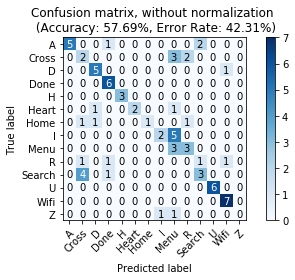

In [79]:
confusion_matrix = plots.plot_confusion_matrix(y_true, y_pred, normalize=False)